In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def goal_sum(gls_list):
    gls_total=0
    for gl in gls_list:
        gls_total+=int(gl.split(' ')[0])
    return gls_total

In [32]:
data_files={
    "s17_18":"../Data/season_2017_18.csv",
    "s18_19":"../Data/season_2018_19.csv",
    "s19_20":"../Data/season_2019_20.csv",
    "s20_21":"../Data/season_2020_21.csv",
    "s21_22":"../Data/season_2021_22.csv",
    "s22_23":"../Data/season_2022_23.csv",
    "s23_24":"../Data/season_2023_24.csv",
}

data_analysis={
    "s17_18":{},
    "s18_19":{},
    "s19_20":{},
    "s20_21":{},
    "s21_22":{},
    "s22_23":{},
    "s23_24":{},
}

teams_gls={
    "liverpool":{
        "s17_18":0,
        "s18_19":0,
        "s19_20":0,
        "s20_21":0,
        "s21_22":0,
        "s22_23":0,
        "s23_24":0,
        "total_gls":0
    },
    "egypt":{
        "s17_18":0,
        "s18_19":0,
        "s19_20":0,
        "s20_21":0,
        "s21_22":0,
        "s22_23":0,
        "s23_24":0,
        "total_gls":0
    }
}

In [33]:
for key,value in data_files.items():
    data=pd.read_csv(value)
    data.rename(columns={"Att_":"TOAtt"},inplace=True)
    data["Squad"]=data["Squad"].replace("eng Liverpool","Liverpool")
    data["Squad"]=data["Squad"].replace("eg Egypt","Egypt" )
    season_attr_column_lenght=len(data.columns)
    
    for i in data.columns[15:season_attr_column_lenght-1]:
        data[i].fillna(round(data[i].mean(),1), inplace=True)
    
    data_analysis[key]["tm"]={}
    data_analysis[key]["tm"]['all']=len(data)
    data_analysis[key]["tm"]['liv']=len(data[data["Squad"]=='Liverpool'])
    data_analysis[key]["tm"]['eg']=len(data[data["Squad"]=='Egypt'])
    # Data aquisition
    for column in data.columns:
        if not(any(isinstance(item, str) for item in data[column])):
            data_analysis[key][column]={}
            if column=="Cmp%":
                data_analysis[key][column]["all"]=np.average(data[column])
                data_analysis[key][column]["liv"]=np.average(data[data["Squad"]=="Liverpool"][column])
                data_analysis[key][column]["eg"]=np.average(data[data["Squad"]=="Egypt"][column])
                
            else: 
                if column=="Min":
                    data_analysis[key]["tfm"]={}
                    data_analysis[key]["tfm"]['all']=len(data[data[column]>=90])
                    data_analysis[key]["tfm"]['liv']=len(data[(data[column]>=90)&(data["Squad"]=="Liverpool")])
                    data_analysis[key]["tfm"]['eg']=len(data[(data[column]>=90)&(data["Squad"]=="Egypt")])
                data_analysis[key][column]["all"]=sum(data[column])
                data_analysis[key][column]["liv"]=sum(data[data["Squad"]=="Liverpool"][column])
                data_analysis[key][column]["eg"]=sum(data[data["Squad"]=="Egypt"][column])
        else: 
            if column =="Date":
                data_analysis[key]["From"]=data["Date"][0]
                data_analysis[key]["To"]=data["Date"][len(data["Date"])-1]
            else:
                data_analysis[key][column]='-'

In [34]:
egypt_matches_logs=pd.read_csv('../Data/Teams/egypt_matches_logs.csv')
liverpool_matches_logs=pd.read_csv('../Data/Teams/liverpool_matches_logs.csv')
# Find duplicates => No duplicated rows found
egypt_matches_logs=egypt_matches_logs.drop_duplicates()
liverpool_matches_logs=liverpool_matches_logs.drop_duplicates()
# The date wasn't sorted, then soring according to the Date 
egypt_matches_logs=egypt_matches_logs.sort_values(by="Date",ascending=False)
liverpool_matches_logs=liverpool_matches_logs.sort_values(by="Date",ascending=False)

In [35]:
# Get period 
# Total Goals
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s17_18"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s23_24"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s17_18"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s23_24"]["To"])]
teams_gls['liverpool']['total_gls']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['total_gls']=goal_sum(eg_matches_logs["GF"])

# Total Goals (s17_18)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s17_18"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s17_18"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s17_18"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s17_18"]["To"])]
teams_gls['liverpool']['s17_18']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s17_18']=goal_sum(eg_matches_logs["GF"])

# Total Goals (s18_19)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s18_19"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s18_19"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s18_19"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s18_19"]["To"])]
teams_gls['liverpool']['s18_19']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s18_19']=goal_sum(eg_matches_logs["GF"])
# Total Goals (s19_20)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s19_20"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s19_20"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s19_20"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s19_20"]["To"])]
teams_gls['liverpool']['s19_20']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s19_20']=goal_sum(eg_matches_logs["GF"])
# Total Goals (s20_21)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s20_21"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s20_21"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s20_21"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s20_21"]["To"])]
teams_gls['liverpool']['s20_21']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s20_21']=goal_sum(eg_matches_logs["GF"])
# Total Goals (s21_22)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s21_22"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s21_22"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s21_22"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s21_22"]["To"])]
teams_gls['liverpool']['s21_22']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s21_22']=goal_sum(eg_matches_logs["GF"])
# Total Goals (s22_23)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s22_23"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s22_23"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s22_23"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s22_23"]["To"])]
teams_gls['liverpool']['s22_23']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s22_23']=goal_sum(eg_matches_logs["GF"])
# Total Goals (s23_24)
eg_matches_logs=egypt_matches_logs[(egypt_matches_logs["Date"]>=data_analysis["s23_24"]["From"])&(egypt_matches_logs["Date"]<=data_analysis["s23_24"]["To"])]
liv_matches_logs=liverpool_matches_logs[(liverpool_matches_logs["Date"]>=data_analysis["s23_24"]["From"])&(liverpool_matches_logs["Date"]<=data_analysis["s23_24"]["To"])]
teams_gls['liverpool']['s23_24']=goal_sum(liv_matches_logs["GF"])
teams_gls['egypt']['s23_24']=goal_sum(eg_matches_logs["GF"])
# Stats
data_analysis['teams_gls']=teams_gls
print(data_analysis['teams_gls'])

{'liverpool': {'s17_18': 135, 's18_19': 115, 's19_20': 114, 's20_21': 97, 's21_22': 147, 's22_23': 103, 's23_24': 142, 'total_gls': 853}, 'egypt': {'s17_18': 8, 's18_19': 25, 's19_20': 3, 's20_21': 9, 's21_22': 16, 's22_23': 16, 's23_24': 11, 'total_gls': 92}}


In [67]:
market_value=pd.read_csv('../Data/market_value_2017_2024.csv')
new_market_values=[]
for i in market_value[market_value.columns[1]]:
    # Strip off the currency symbol and convert to float
    new_market_values.append(float(i.strip('€')))
new_market_values

[40.0,
 80.0,
 150.0,
 150.0,
 150.0,
 150.0,
 120.0,
 120.0,
 110.0,
 100.0,
 100.0,
 90.0,
 80.0,
 70.0,
 65.0,
 65.0,
 55.0]

### Visualization

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\1536047114.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Market Value (Aug 12, 2017 – Jun 10, 2024)')

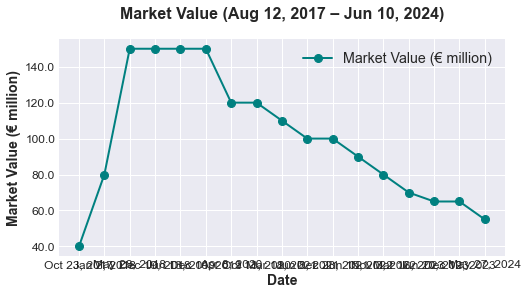

In [68]:
goals_per_season=pd.DataFrame({
    market_value.columns[0]:market_value[market_value.columns[0]],
    market_value.columns[1]:new_market_values,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(16, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


goals_per_season.plot(x= market_value.columns[0], y=goals_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel(market_value.columns[0], fontsize=14, fontweight='bold')
axes.set_ylabel(market_value.columns[1], fontsize=14, fontweight='bold')
axes.set_xticks(range(len(goals_per_season[market_value.columns[0]])))
axes.set_xticklabels(goals_per_season[market_value.columns[0]], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Market Value (Aug 12, 2017 – Jun 10, 2024)', fontsize=16, fontweight='bold', pad=20)

In [36]:
total_passes=[]
total_passes_completed=[]
total_passes_progressive=[]
for key,value in data_analysis.items():
    try:
        total_passes.append(round(value['Att']["all"]))
        total_passes_completed.append(round(value['Cmp']["all"]))
        total_passes_progressive.append(round(value['PrgP']["all"]))
    except:''

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\2502113522.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


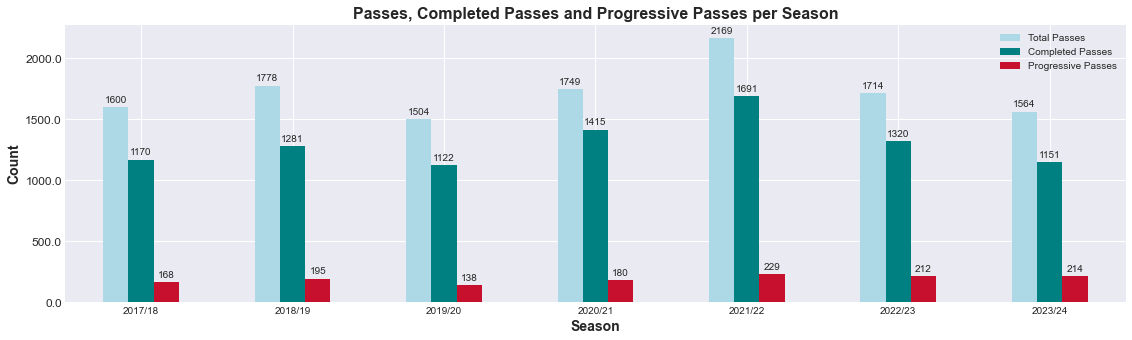

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Total Passes': total_passes,
    'Completed Passes': total_passes_completed,
    'Progressive Passes': total_passes_progressive,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 5))

# Plot shots
bars = df_shots.plot(x='Season', y=['Total Passes', 'Completed Passes','Progressive Passes'], kind='bar', title='Passes, Completed Passes and Progressive Passes per Season', color=['lightblue', 'teal','#c70f2e'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\1088670080.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


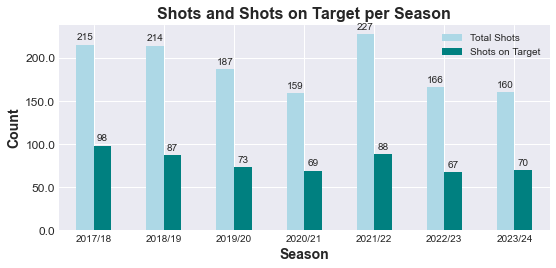

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
total_shots=[]
total_sot=[]
shot_acc=[]
for key,value in data_analysis.items():
    try:
        total_shots.append(round(value['Sh']["all"]))
        total_sot.append(round(value['SoT']["all"]))
        shot_acc.append(round(value['SoT']["all"]/value['Sh']["all"]*100))
    except:''

# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Total Shots': total_shots,
    'Shots on Target': total_sot,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot shots
bars = df_shots.plot(x='Season', y=['Total Shots', 'Shots on Target'], kind='bar', title='Shots and Shots on Target per Season', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3212786423.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Shot Accuracy per Season')

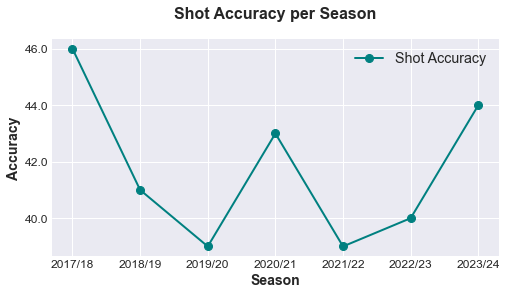

In [39]:
goals_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Shot Accuracy":shot_acc,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


goals_per_season.plot(x='Season', y=goals_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(goals_per_season['Season'])))
axes.set_xticklabels(goals_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Shot Accuracy per Season', fontsize=16, fontweight='bold', pad=20)

In [40]:
total_goals=[]
total_goals_eg=[]
total_goals_liv=[]
for key,value in data_analysis.items():
    try:
        total_goals.append(round(value['Gls']["all"]))
        total_goals_eg.append(round(value['Gls']["eg"]))
        total_goals_liv.append(round(value['Gls']["liv"]))
    except:''

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\257755313.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Goals per Season')

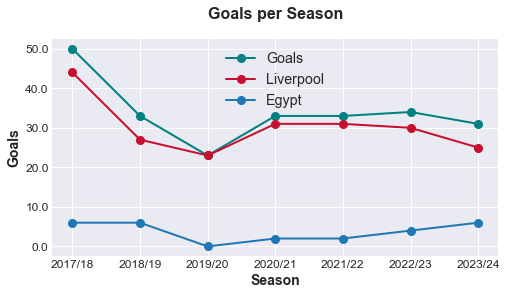

In [41]:
goals_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Goals":total_goals,
    "Liverpool":total_goals_liv,
    "Egypt":total_goals_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


goals_per_season.plot(x='Season', y=goals_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Goals', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(goals_per_season['Season'])))
axes.set_xticklabels(goals_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Goals per Season', fontsize=16, fontweight='bold', pad=20)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\2116979204.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Assists per Season')

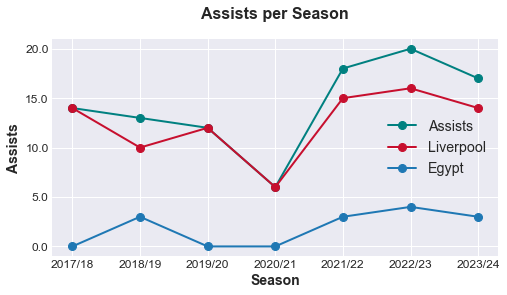

In [42]:
total_assists=[]
total_assists_eg=[]
total_assists_liv=[]
for key,value in data_analysis.items():
    try:
        total_assists.append(round(value['Ast']["all"]))
        total_assists_eg.append(round(value['Ast']["eg"]))
        total_assists_liv.append(round(value['Ast']["liv"]))
    except:''
        
assists_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Assists":total_assists,
    "Liverpool":total_assists_liv,
    "Egypt":total_assists_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


assists_per_season.plot(x='Season', y=assists_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Assists', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(assists_per_season['Season'])))
axes.set_xticklabels(assists_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Assists per Season', fontsize=16, fontweight='bold', pad=20)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\1691220547.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Goal Contribution per Season')

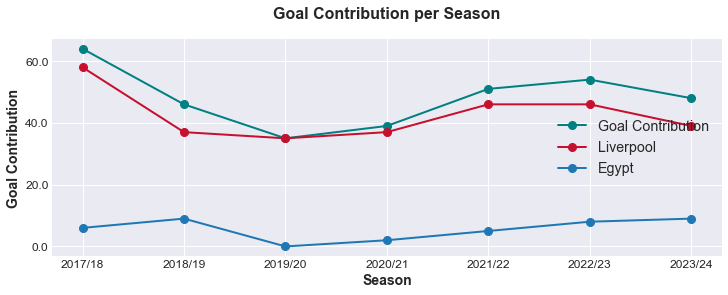

In [43]:
total_goal_contribution=[]
total_goal_contribution_eg=[]
total_goal_contribution_liv=[]
for key,value in data_analysis.items():
    try:
        total_goal_contribution.append(round(value['Ast']["all"])+round(value['Gls']["all"]))
        total_goal_contribution_eg.append(round(value['Ast']["eg"])+round(value['Gls']["eg"]))
        total_goal_contribution_liv.append(round(value['Ast']["liv"])+round(value['Gls']["liv"]))
    except:''
    
goal_contribution_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Goal Contribution":total_goal_contribution,
    "Liverpool":total_goal_contribution_liv,
    "Egypt":total_goal_contribution_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(12, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


goal_contribution_per_season.plot(x='Season', y=goal_contribution_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Goal Contribution', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(goal_contribution_per_season['Season'])))
axes.set_xticklabels(goal_contribution_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Goal Contribution per Season', fontsize=16, fontweight='bold', pad=20)

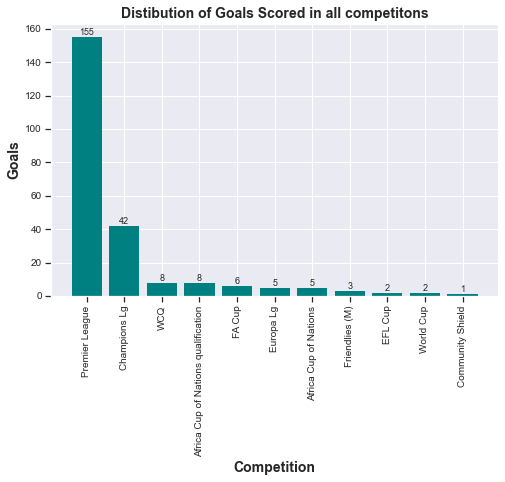

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
plt.style.use('seaborn-darkgrid')

# Set a color palette and other parameters using seaborn
sns.set_palette('coolwarm')
sns.set_context('notebook', font_scale=1.3)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(figsize=(8, 5))  # Adjust the figsize for layout

# Plot the first bar plot on the first subplot
counts1 = pd.read_csv('../Data/goal_logs_2017_2024.csv')['Comp'].value_counts()
bars1 = axes.bar(counts1.index, counts1.values, color='teal',alpha=1)
axes.set_title('Distibution of Goals Scored in all competitons', fontsize=14, fontweight='bold')
axes.set_xlabel('Competition', fontsize=14,fontweight='bold')
axes.set_ylabel('Goals', fontsize=14,fontweight='bold')
axes.tick_params(axis='x', labelsize=10, rotation=90)  # Adjust font size and rotation
axes.tick_params(axis='y', labelsize=10)  # Adjust font size and rotation

# Add frequency labels on top of each bar in the first subplot
for bar in bars1:
    yval = bar.get_height()
    axes.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)


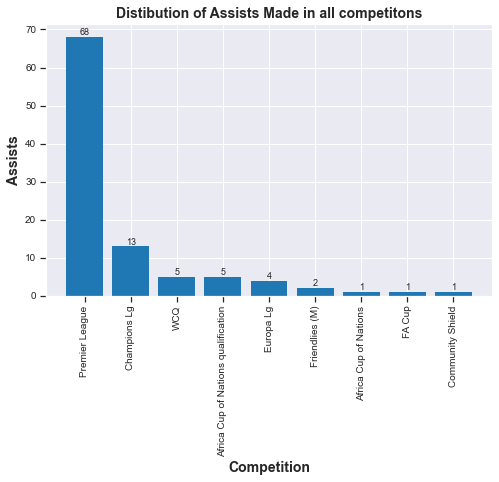

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
plt.style.use('seaborn-darkgrid')

# Set a color palette and other parameters using seaborn
sns.set_palette('coolwarm')
sns.set_context('notebook', font_scale=1.3)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(figsize=(8, 5))  # Adjust the figsize for layout

# Plot the first bar plot on the first subplot
counts1 = pd.read_csv('../Data/assist_logs_2017_2024.csv')['Comp'].value_counts()
bars1 = axes.bar(counts1.index, counts1.values, color='#1F78B4',alpha=1)
axes.set_title('Distibution of Assists Made in all competitons', fontsize=14, fontweight='bold')
axes.set_xlabel('Competition', fontsize=14,fontweight='bold')
axes.set_ylabel('Assists', fontsize=14,fontweight='bold')
axes.tick_params(axis='x', labelsize=10, rotation=90)  # Adjust font size and rotation
axes.tick_params(axis='y', labelsize=10)  # Adjust font size and rotation

# Add frequency labels on top of each bar in the first subplot
for bar in bars1:
    yval = bar.get_height()
    axes.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=9)


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3536978240.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Minutes Played per Season')

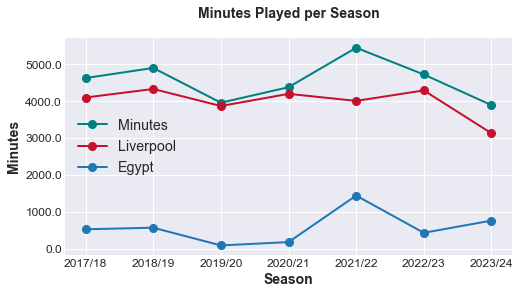

In [46]:
total_minutes=[]
total_minutes_eg=[]
total_minutes_liv=[]
for key,value in data_analysis.items():
    try:
        total_minutes.append(round(value['Min']["all"]))
        total_minutes_eg.append(round(value['Min']["eg"]))
        total_minutes_liv.append(round(value['Min']["liv"]))
    except:''

minutes_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Minutes":total_minutes,
    "Liverpool":total_minutes_liv,
    "Egypt":total_minutes_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


minutes_per_season.plot(x='Season', y=minutes_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Minutes', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(minutes_per_season['Season'])))
axes.set_xticklabels(minutes_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Minutes Played per Season', fontsize=14, fontweight='bold', pad=20)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3397078235.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Full Matches Played per Season')

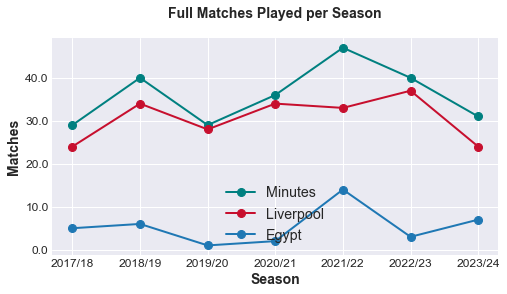

In [47]:
total_full_matches=[]
total_full_matches_eg=[]
total_full_matches_liv=[]
for key,value in data_analysis.items():
    try:
        total_full_matches.append(round(value['tfm']["all"]))
        total_full_matches_eg.append(round(value['tfm']["eg"]))
        total_full_matches_liv.append(round(value['tfm']["liv"]))
    except:''

minutes_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Minutes":total_full_matches,
    "Liverpool":total_full_matches_liv,
    "Egypt":total_full_matches_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


minutes_per_season.plot(x='Season', y=minutes_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Matches', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(minutes_per_season['Season'])))
axes.set_xticklabels(minutes_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Full Matches Played per Season', fontsize=14, fontweight='bold', pad=20)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3618946040.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


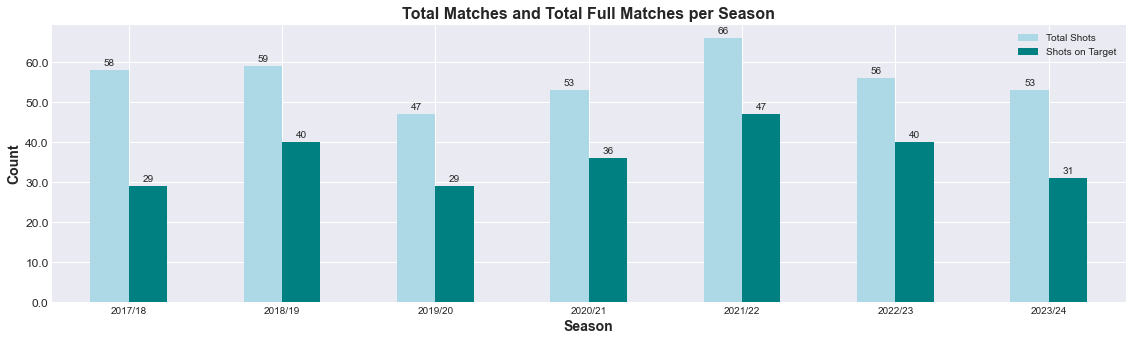

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
total_matches=[]
total_full_matches=[]
for key,value in data_analysis.items():
    try:
        total_matches.append(round(value['tm']["all"]))
        total_full_matches.append(round(value['tfm']["all"]))
    except:''

# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Total Shots': total_matches,
    'Shots on Target': total_full_matches,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 5))

# Plot shots
bars = df_shots.plot(x='Season', y=['Total Shots', 'Shots on Target'], kind='bar', title='Total Matches and Total Full Matches per Season', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


In [49]:
total_blocks=[]
total_int=[]
total_tkl=[]
for key,value in data_analysis.items():
    try:
        total_blocks.append(round(value['Blocks']["all"]))
        total_int.append(round(value['Int']["all"]))
        total_tkl.append(round(value['Tkl']["all"]))
    except:''

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\1845169051.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


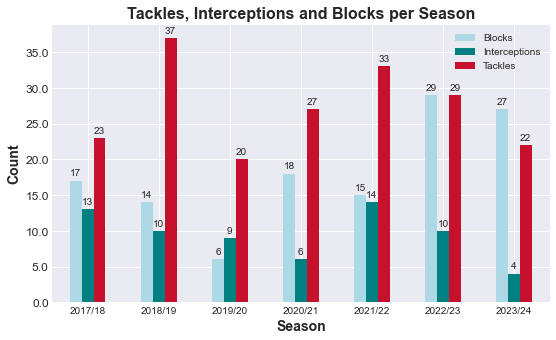

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Tackles': total_tkl,
    'Interceptions': total_int,
    'Blocks': total_blocks,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot shots
bars = df_shots.plot(x='Season', y=['Blocks', 'Interceptions','Tackles'], kind='bar', title='Tackles, Interceptions and Blocks per Season', color=['lightblue', 'teal','#c70f2e'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3823131696.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(), fontsize=12)


Text(0.5, 1.0, 'Defensive Actions per Season')

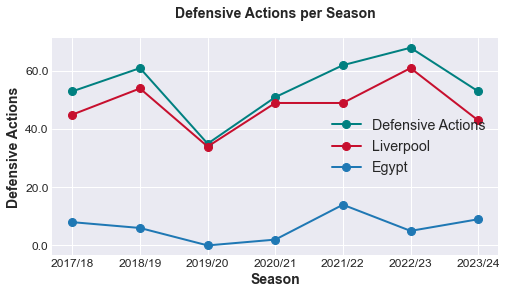

In [51]:
defensive_actions=[]
defensive_actions_liv=[]
defensive_actions_eg=[]
for key,value in data_analysis.items():
    try:
        defensive_actions.append(round(value['Blocks']["all"])+round(value['Tkl']["all"])+round(value['Int']["all"]))
        defensive_actions_eg.append(round(value['Blocks']["eg"])+round(value['Tkl']["eg"])+round(value['Int']["eg"]))
        defensive_actions_liv.append(round(value['Blocks']["liv"])+round(value['Tkl']["liv"])+round(value['Int']["liv"]))
    except:''

minutes_per_season=pd.DataFrame({
    "Season":["2017/18","2018/19","2019/20","2020/21","2021/22","2022/23","2023/24"],
    "Defensive Actions":defensive_actions,
    "Liverpool":defensive_actions_liv,
    "Egypt":defensive_actions_eg,
})

# Apply modern style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(figsize=(8, 4))  # Create 2 rows and 3 columns of subplots
fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Decrease space between plots


minutes_per_season.plot(x='Season', y=minutes_per_season.columns[1:], kind='line', marker='o', linewidth=2, markersize=8, color=['teal', "#c70f2e", "#1F78B4"], ax=axes)
axes.set_xlabel('Season', fontsize=14, fontweight='bold')
axes.set_ylabel('Defensive Actions', fontsize=14, fontweight='bold')
axes.set_xticks(range(len(minutes_per_season['Season'])))
axes.set_xticklabels(minutes_per_season['Season'], fontsize=12)
axes.set_yticklabels(axes.get_yticks(), fontsize=12)
axes.set_title('Defensive Actions per Season', fontsize=14, fontweight='bold', pad=20)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\3911963795.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


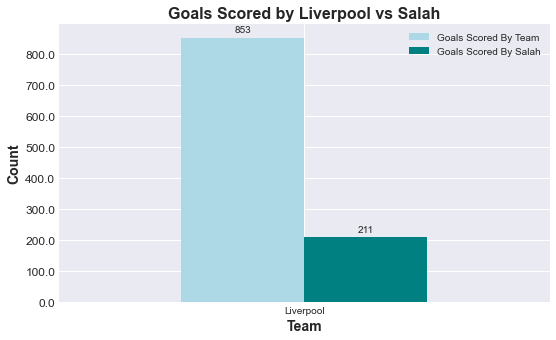

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame
data_shots = {
    'Team': ['Liverpool'],
    'Goals Scored By Team': [853],
    'Goals Scored By Salah': [211],
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot shots
bars = df_shots.plot(x='Team', y=['Goals Scored By Team', 'Goals Scored By Salah'], kind='bar', title='Goals Scored by Liverpool vs Salah', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Team', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Team'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\160372240.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


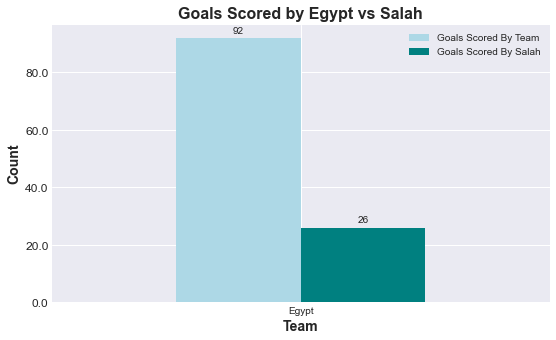

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame
data_shots = {
    'Team': ['Egypt'],
    'Goals Scored By Team': [92],
    'Goals Scored By Salah': [26],
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot shots
bars = df_shots.plot(x='Team', y=['Goals Scored By Team', 'Goals Scored By Salah'], kind='bar', title='Goals Scored by Egypt vs Salah', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Team', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Team'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


In [54]:
liv_gls=[]
total_gls=[]
for key,value in data_analysis.items():
    try:
        total_gls.append(round(value['Gls']["liv"]))
        liv_gls.append(teams_gls['liverpool'][key])
    except: print("e")

sum(liv_gls)

e


853

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\264516994.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


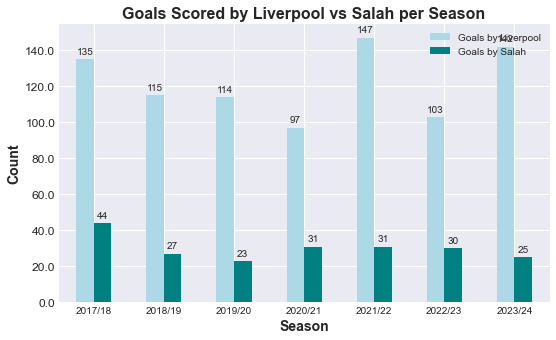

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Goals by Liverpool': liv_gls,
    'Goals by Salah': total_gls,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot shots
bars = df_shots.plot(x='Season', y=['Goals by Liverpool', 'Goals by Salah'], kind='bar', title='Goals Scored by Liverpool vs Salah per Season', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


In [56]:
eg_gls=[]
total_gls=[]
for key,value in data_analysis.items():
    try:
        total_gls.append(round(value['Gls']["eg"]))
        eg_gls.append(teams_gls['egypt'][key])
    except: print("e")

e


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_14380\176830399.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


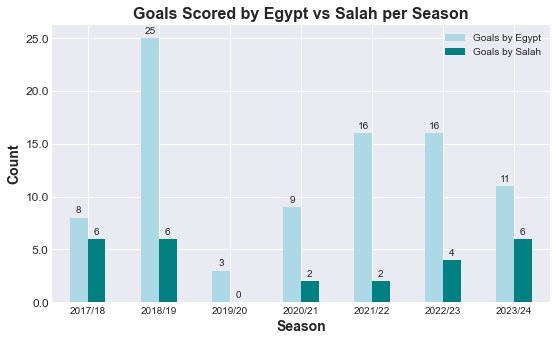

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame
data_shots = {
    'Season': ['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Goals by Egypt': eg_gls,
    'Goals by Salah': total_gls,
}
df_shots = pd.DataFrame(data_shots)
# Apply modern style
plt.style.use('seaborn-darkgrid')
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot shots
bars = df_shots.plot(x='Season', y=['Goals by Egypt', 'Goals by Salah'], kind='bar', title='Goals Scored by Egypt vs Salah per Season', color=['lightblue', 'teal'], ax=ax)

# Customize the plot
ax.set_xlabel('Season', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_shots['Season'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.tick_params(axis='x', labelsize=10, rotation=0)  # Adjust font size and rotation

ax.legend(fontsize=10)  # Adjust legend font size

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()
